### 인간관계 네트워크 가시화

In [1]:
import pandas as pd
df_links = pd.read_csv("links.csv")
df_links

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,Node5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Node6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Node7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,Node8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Node9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


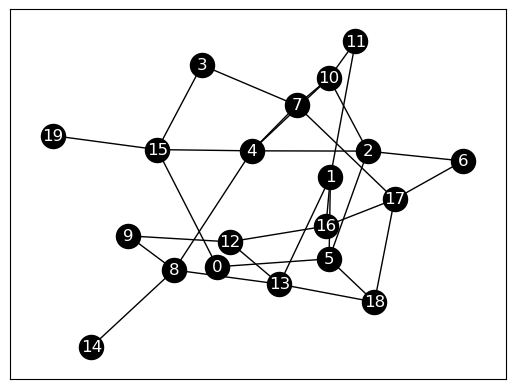

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# 객체 설정
G = nx.Graph()

#노드 설정 : 노드 이름에 숫자만 0~19 이름붙임
for i in range(1, len(df_links.index)+1): #df_links의 첫열은 unnamed이므로 제외
    G.add_node(df_links.columns[i].strip('Node'))#Node를 빼겠다
#엣지 설정 : 노드 간(i, j간) 깂이 1인 경우만 엣지로 연결
for i in range(len(df_links.index)):
    for j in range(len(df_links.index)):
        node_name = 'Node' + str(j)
        
        if df_links[node_name].iloc[i] == 1:
            G.add_edge(str(i), str(j))
            
#그리기
nx.draw_networkx(G, node_color = 'k', edge_color = 'k', font_color = 'w')
plt.show()
    


### 입소문에 의한 전파 시뮬 시각화 random함수


In [3]:
# 입소문 전파 확률 10%를 np.random.rand()
def determine_link(percent): # percent는 우리가 임의로 0.1(10퍼)로 넣을 것임
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else: return 0
# rand_val은 np.random.rand()가 랜덤하게 뽑은 0~1사이 난수 random.rand() = random.random()


In [4]:
# 입소문 시뮬레이션
def simulate_percolation(num, list_active, percent_percolation):# num:사람수(20명), list_active:각 사람의 입소문이 전달되었나(!,0), percent_percolation : 앞에서 determine_link함수에 넣는 확률 (0.1)
    
    for i in range(num):
        if list_active[i] == 1: #어떤 사람 i의 입소문이 전달된 경우
            for j in range(num): #i랑 연결된 다른 j에 대해서..
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i] == 1: #i 와 j가 연결 되어있다면
                    if determine_link(percent_percolation) == 1:# 그렇다면 랜덤 확률이 10%보다 작나
                        list_active[j] = 1 #이것도 맞다면 j 너는 입소문이 전달 되었다 1로 두겠다
    return list_active
    

In [5]:
percent_percolation = 0.1
T_NUM = 36
NUM = len(df_links.index) # 20개 노드 (0~19)
list_active = np.zeros(NUM) # 모두 0으로 초기화
list_active[0] = 1# 첫번째 노드에만 1을 넣어줌, 입소문을 일으키면 36개월 뒤엔 어떻게 될까
list_active
#전파 확률 = 0.1%
# 입소문 개월수(T_NUM) = 36개
# 사람수(NUM) = 20

list_ts = []
for t in range(T_NUM): #df_links 데이터로 시뮬레이션을 36번 해봄
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_ts.append(list_active.copy())
list_ts

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0.]),
 array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 0.]),
 array([1., 1., 0., 

In [6]:
# 컬러링 함수 list_active값이 들어오면 list_color반환
def active_node_coloring(t, list_active):# t에는 몇번째 list_ts값을 반환할지 넣는다 개월수
    list_color = []
    for i in range(len(list_ts[t])):
        if list_ts[t][i] == 1:
            list_color.append('r')
        else:
            list_color.append('k')
    return list_color
# t에 12를 넣는다면 list_ts의 12번째 리스트가 나오고 0~12 즉13개월째 입소문 현황을 시각화


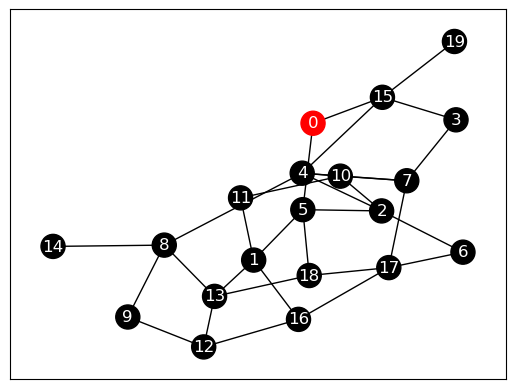

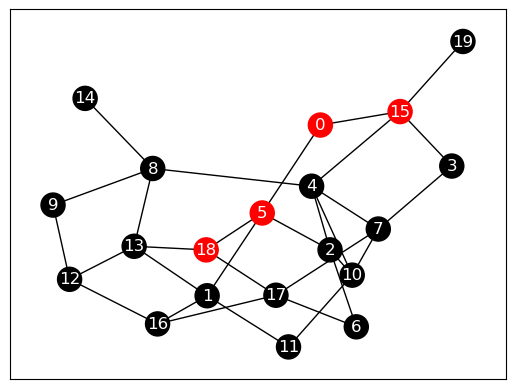

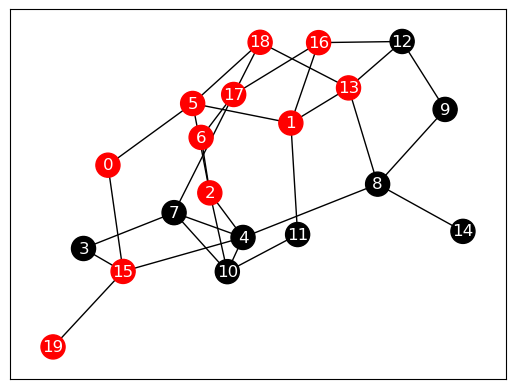

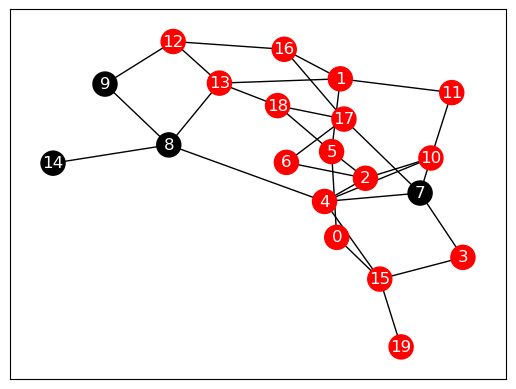

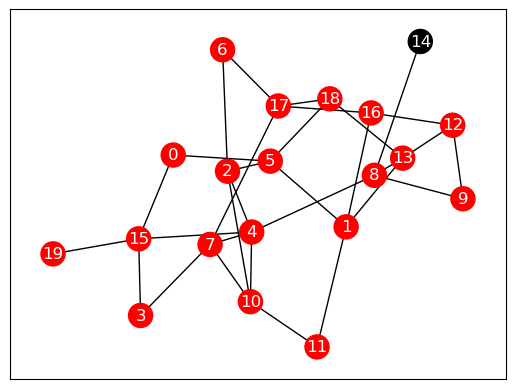

In [7]:
# 1개월, 6개월, 12개월, 24개월, 36개월일 때 전파 모습 비교
t_list = [0,5,11,23,25]
for t in t_list:
    nx.draw_networkx(G, font_color = 'w', node_color = active_node_coloring(t, list_ts))
    plt.show()

### 입소문 전파를 시계열 그래프 - x축 : 개월,  y축 입소문 전파 수의합

In [8]:
print(list_ts[0], sum(list_ts[0])) # 1개월차 전파수 합계
print(list_ts[9], sum(list_ts[9])) # 10개월차 전파수 합계


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 1.0
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.] 6.0


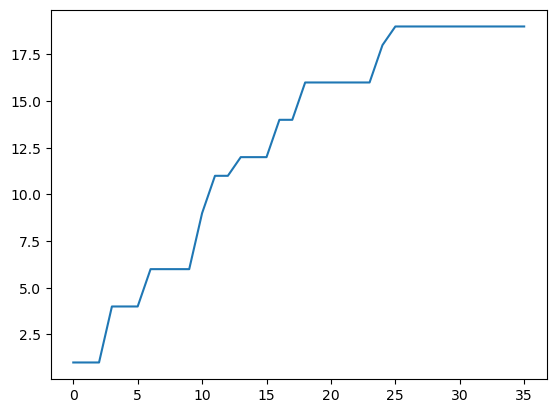

In [11]:
#list_ts_num 리스트를 만들어 개월별 전파수 합계
list_ts_num = []
for i in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[i]))

plt.plot(list_ts_num)
plt.show()

### 확산 및 소멸확률을 이용해 입소문 전파 시뮬레이션


In [12]:
#전파 확률 10%, 소멸 확률 5%
def simulate_population(num, list_active, percent_percolation, percent_disappearence, df_links):
    
    # 확산 - 이전에 만든 코드
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                if df_links.iloc[i][j] == 1:
                    if determine_link(percent_percolation) == 1:
                        list_active[j] = 1
    #소멸
    for i in range(num):
        if determine_link(percent_disappearence) == 1:
            # 반대로 랜덤확률이 소멸할 확률보다도 작으면 전파가 꺼지는 것(0)으로 설정
            list_active[i] = 0
    return list_active

In [15]:
T_NUM = 100 # 100개월 동안 어떻게 바뀔지 지켜보자
NUM = len(df_links.index)

# list_active 초기화
list_active = np.zeros(NUM)
list_active[0] = 1

### 100개월 시뮬레이션 ###
list_ts = []
for i in range(T_NUM):
    #임의로 확산할 확률 10%, 소멸할 확률 5%로 둠
    list_active = simulate_population(NUM, list_active, 0.1,0.05, df_links)
    #시뮬레이션 과정 100번 반복해서 list_ts에 쌓음
    list_ts.append(list_active.copy())

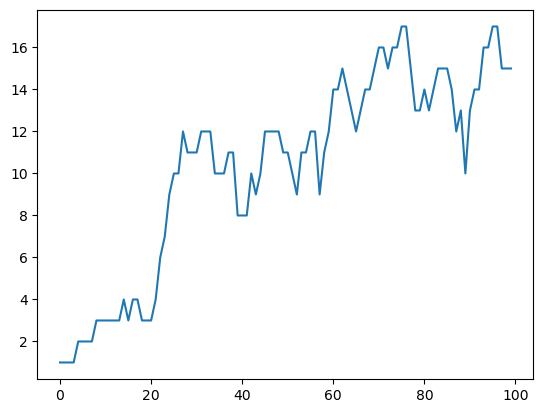

In [16]:
#list_ts_num 리스트를 만들어 개월별 전파수 합계
list_ts_num = []
for i in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[i]))

plt.plot(list_ts_num)
plt.show()

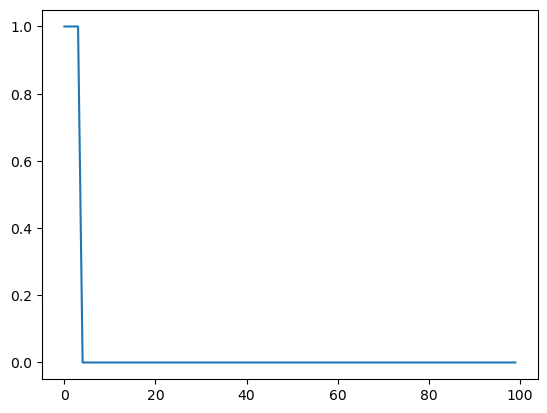

In [17]:
T_NUM = 100 # 100개월 동안 어떻게 바뀔지 지켜보자
NUM = len(df_links.index)

# list_active 초기화
list_active = np.zeros(NUM)
list_active[0] = 1

### 100개월 시뮬레이션 ###
list_ts = []
for i in range(T_NUM):
    #임의로 확산할 확률 10%, 소멸할 확률 5%로 둠
    list_active = simulate_population(NUM, list_active, 0.1,0.2, df_links)
    #시뮬레이션 과정 100번 반복해서 list_ts에 쌓음
    list_ts.append(list_active.copy())
#list_ts_num 리스트를 만들어 개월별 전파수 합계
list_ts_num = []
for i in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[i]))

plt.plot(list_ts_num)
plt.show()  

### 파라미터 간의 상관관계 파악

In [22]:
for i in range(20):
    print(0.05*i)


0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001


In [25]:
# 상관관계 계산
print("상관관계 계산시작")
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))
for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p  #확산확률
        percent_disapparence = 0.05*i_d #소멸확률
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)
print(phaseDiagram)

상관관계 계산시작
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 16. 14.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 13. 13.  9. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 15. 16.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17.  0. 12. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 16. 14. 11. 11.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 19. 18.  0.  0. 12. 14. 14.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 17. 17. 18. 13. 14. 10. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 15. 17. 18. 16.  9.  0. 13.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [20. 18. 17. 18. 17. 14.  8. 11.  7.  4.  9.  0.  0.  

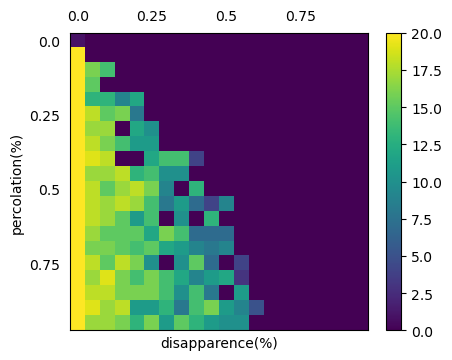

In [30]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8) # colorbar 길이 조정
plt.xlabel('disapparence(%)')
plt.ylabel('percolation(%)')
plt.xticks(np.arange(0.0,20.0,5), np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5), np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.show()

#소멸확률이 낮으면 확산확률이 어느정도 낮더라도 20명 전원이 이용한다.
#반대로 소멸확률이 0.2를 넘어서면 확산확률이 높아도 이용자는 절대 20명 전원까지 전파될 수 없다


### 실제 데이터

In [45]:
df_mem_info = pd.read_csv('info_members.csv')
df_mem_links = pd.read_csv('links_members.csv')

print(df_mem_links.shape, df_mem_info.shape)
display(df_mem_links.head(), df_mem_info.head())

#mem_link : 회원 540명끼리의 SNS연결상태가 나와있다. 연결 1 비연결 0
#mem_infor : 지난 24개월동안의 회원 540명의 쇼핑몰 이용상태 1 : 사용, 0 : 비사용

(540, 541) (540, 25)


,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 링크 수 분포를 시각화



In [32]:
NUM = len(mem_link.index) #540
array_linkNUM = np.zeros(NUM) # 초기화

for i in range(NUM):
    array_linkNUM[i] = sum(mem_link["Node" + str(i)]) # 각 노드별로 총 몇 명이랑 이어졌나
    # ex node[i]와 다른 node와 연결된 개수 더하기 연결되면 1이기 때문
print(array_linkNUM)

[ 32. 128. 155.  44. 108.  32. 152. 135. 143.  75. 125.  96. 107. 141.
 165.  71.  92. 180.  67.  30.  79.  11. 195. 139. 175. 148. 127. 162.
  95. 125.  55. 120. 148. 114. 143.  22. 129.  56.  17.  79.  78.  78.
 159. 183.  79.  99.  36.  41. 136.  31. 119. 180. 169. 167. 124.  37.
 152.  21.  77.  55.  38.  67. 103. 103. 114. 109.  92. 122. 190.  33.
 196.  50. 165.  17. 123.  97.  19. 132.  54. 113. 106. 174. 111. 107.
 193. 117. 164.  53. 125.  67. 175.  82. 111.  94.  98. 106.  89.  28.
  98.  41.  59.  55. 146. 131.  91.  45. 136.  89. 122.  65. 110.  88.
 117.  71. 157. 112. 106. 148.  54. 127. 149. 174.  89.  65. 159.  56.
 109. 105. 133.  64. 126.  98. 118.  87.  98.  99.  45. 123.  90. 100.
  85. 133. 129.  53.  80.  35.  61. 124. 109. 101. 166.  49.  57. 128.
  65. 134.  72.  51.  91.  35.  87.  69. 109.  84.  99.  99. 115.  93.
 123.  58. 183. 117. 123.  53. 176. 121.  61.  88. 140.  99.  99. 101.
 127. 162.  92. 141.  46. 122.  73.  91.  78.  71. 171.  69. 116. 198.
 143. 

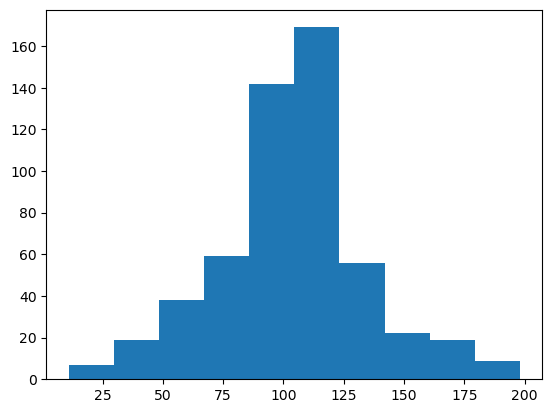

In [33]:
plt.hist(array_linkNUM, bins=10)
plt.show()
# 연결된 수가 100명 언저리인 사람이 대다수이다

### 시뮬레이션을 위한 파라미터 추정

In [35]:
NUM = len(mem_info.index) #540
T_NUM= len(mem_info.columns)-1 #24 (unnamed가있어서)

# 소멸확률 추정 : 노드가 t시점에는 이용했지만 바로다음인 t+1 시점에선 이용하지 않을 확률

count_active = 0
count_active_to_inactive = 0

for t in range(1, T_NUM):
    for i in range(NUM):
        if(mem_info.iloc[i][t] == 1): #만약 특정 t시점에서 Node i가 이용한 적 있다면?
            
            count_active += 1
            if (mem_info.iloc[i][t+1] == 0): #그런데 t+1 시점에서 이용한 적없다?
                count_active_to_inactive += 1
print(count_active_to_inactive/count_active)

0.10147163541419416


### 확산확률 추정

In [47]:
# 가정 : 전파가 된 이유는 다른 고객과 연결되기 때문으로만 한정한다
# 확산확률 추정

count_link = 0
count_link_to_active = 0
count_link_temp = 0
for t in range(T_NUM-1):
    #t 기간에 방문한 적 있는 노드들 (노드A)
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    #540명 노드의 flag값 현재는 모두 0
    # 만일 t기간에 방문안한다음 t+1에 방문했으면
    #기존 A노드와 연결 되어있기 때문이라고 보고 이를 1로 바꿈
    
    temp_flag_count = np.zeros(NUM)
    #df_link_t의 개별 노드 하나씩에 대해
    for i in range(len(df_link_t.index)):
        #노드 A와 연결된 A'들로 df_link_temp 생성
        df_link_temp = df_mem_links[df_mem_links["Node"+str(df_link_t.index[i])]==1]
        
        for j in range(len(df_link_temp.index)):
            #A' 들이 t기간에 방문안했니?
            if (df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                #그리고 A'들이 temp_flag_count 값이 0이니? (디폴트값)
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    #그렇다면 count_link를 1씩 추가
                    count_link += 1
                    #A'들이 t+1 기간엔 방문을했니?
                if (df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    #그리고 A'들이 temp_flag_count 값이 0이니? (디폴트값)
                    if (temp_flag_count[df_link_temp.index[j]]==0):
                        #그렇다면 A' 노드 번호인 temp_flag_count 값은 1로 변경
                        temp_flag_count[df_link_temp.index[j]] = 1 
                        #count_link_to_active를 1씩 추가
                        count_link_to_active += 1
estimated_percent_percolation = count_link_to_active/count_link
print(estimated_percent_percolation)

0.025184661323275185


### 실제 데이터와 시뮬레이션 비교

In [48]:
#각 앞에서 구한 확산확률 소멸확률
p_percent = count_link_to_active/count_link
d_percent = count_active_to_inactive/count_active

print(p_percent, d_percent)

0.025184661323275185 0.10147163541419416


In [49]:
## 시뮬레이션 - df_link -> mem_link, 그리고 확산/소멸확률 파라미터 바꾸기
## (밑의 for문은 시간이 오래걸리니 주의 약 40분 소요)

T_NUM = 24 # 24개월 동안 어떻게 바뀔지
NUM = len(mem_link.index) # 540명
list_active = np.zeros(NUM)
list_active[0] = 1 #노드 0이 입소문 퍼뜨리기 시작

list_ts = []
for t in range(T_NUM):
    # 확산 소멸확률 파라미터 지정
    list_active = simulate_population(NUM, list_active, p_percent, d_percent, mem_link)
    #시뮬레이션 과정 24번에 걸쳐 list_ts에 쌓음
    list_ts.append(list_active.copy())

In [ ]:
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num) # 총 24개월을 거치며 전파된 노드의 수 시각화
plt.show()

In [ ]:
plt.plot(list_ts.num, label = 'simulation')
plst.plot(list_ts_real, label = 'real')
plt.xlabel('month')
plt.ylabel('population #')
plt.legend(loc = 'lower right')
plt.show()

### 시뮬레이션으로 미래 예측

In [ ]:
T_NUM = 36 #36개월 동안 어떻게 바뀔지 지켜보자
NUM = len(mem_link.index) # 540
list_active = np.zeros(NUM)
list_active[0] = 1 #노드가0 입소문 퍼뜨림

list_ts = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, p_percent, d_percent, mem_link)
    list_ts.append(list_active.copy())

#아까전에 만든 코드
list_ts_num = []

for t in range(len(list_ts)):
    list_ts_num.append(sum(list_ts[t]))
    
plt.plot(list_ts_num, label = 'simulated')
plt.xlabel('month')
plt.ylabel('population #')
plt.legend(loc = 'lower right')
plt.show()